In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [5]:
year = "2023"

In [10]:
# Read data
df = pd.read_csv("data/" + year + "_subs_agg.csv")
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,CHI,4.090909,56.954545,67.136364,73.428571,76.062500,83.111111,22,22,21,16,9
1,HOU,3.954545,54.545455,64.750000,76.550000,81.866667,91.000000,22,20,20,15,9
2,KCC,3.954545,53.454545,68.136364,79.476190,83.571429,87.714286,22,22,21,14,7
3,LA,4.409091,57.272727,64.318182,70.272727,78.842105,82.083333,22,22,22,19,12
4,LOU,4.090909,57.136364,67.727273,73.285714,84.111111,84.142857,22,22,21,18,7
5,NC,3.590909,60.857143,69.476190,77.055556,83.833333,84.714286,21,21,18,12,7
6,NJY,4.318182,52.772727,65.590909,75.857143,79.944444,85.000000,22,22,21,18,12
7,ORL,4.000000,54.318182,68.772727,78.857143,82.466667,82.375000,22,22,21,15,8
8,POR,4.454545,55.590909,65.409091,70.428571,76.611111,80.533333,22,22,21,18,15
9,RGN,4.227273,53.954545,69.545455,75.450000,84.111111,86.600000,22,22,20,18,10


In [11]:
# Sort data
df = df.sort_values("sub_0_min", ascending=False).reset_index(drop=True)
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,NC,3.590909,60.857143,69.476190,77.055556,83.833333,84.714286,21,21,18,12,7
1,WAS,3.545455,60.727273,72.590909,80.764706,89.500000,87.400000,22,22,17,12,5
2,LA,4.409091,57.272727,64.318182,70.272727,78.842105,82.083333,22,22,22,19,12
3,LOU,4.090909,57.136364,67.727273,73.285714,84.111111,84.142857,22,22,21,18,7
4,CHI,4.090909,56.954545,67.136364,73.428571,76.062500,83.111111,22,22,21,16,9
5,POR,4.454545,55.590909,65.409091,70.428571,76.611111,80.533333,22,22,21,18,15
6,HOU,3.954545,54.545455,64.750000,76.550000,81.866667,91.000000,22,20,20,15,9
7,ORL,4.000000,54.318182,68.772727,78.857143,82.466667,82.375000,22,22,21,15,8
8,RGN,4.227273,53.954545,69.545455,75.450000,84.111111,86.600000,22,22,20,18,10
9,SD,4.045455,53.863636,63.863636,75.818182,83.823529,84.000000,22,22,22,17,6


<Figure size 5600x4000 with 0 Axes>

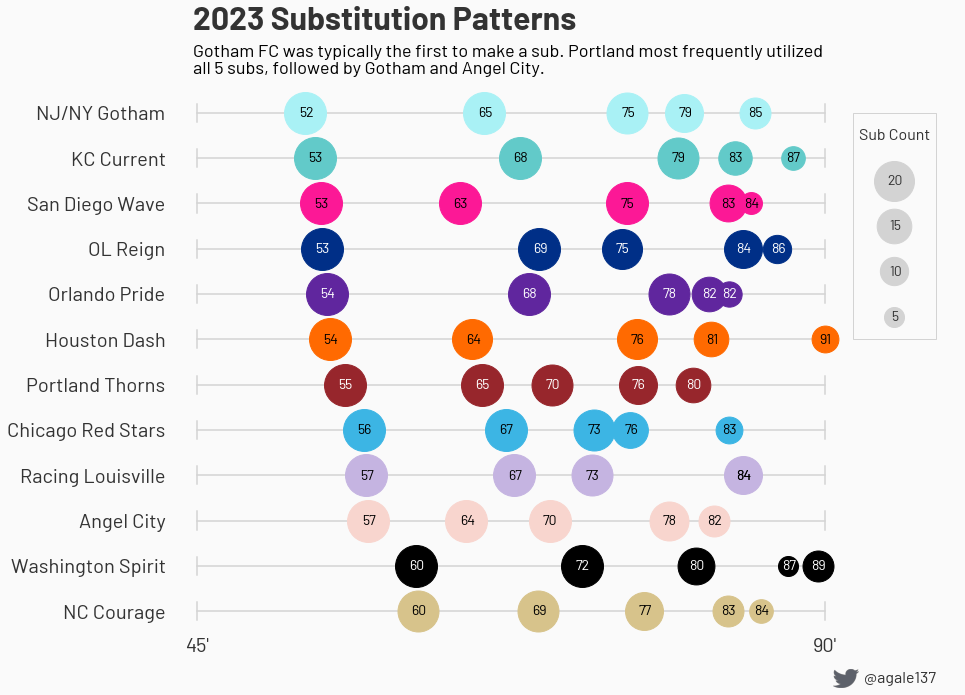

In [20]:
# Setup
plt.rcParams["figure.figsize"] = (14, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
for y, row in df.iterrows():
    # Background timeline
    ax.plot([45, 90], [y, y], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([45, 45], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([90, 90], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)

    for x, i in [(row["sub_" + str(i) + "_min"], i) for i in range(0, 5)]:
        label = str(int(x))
        if x > 90:
            x = 90
        if row["team"] in ["SD", "ORL", "NC"]:
            if i == 3:
                x = x - 0.75
            elif i ==4:
                x = x + 0.75
        ax.scatter(
            [x],
            [y],
            color=NWSL.color(row["team"]),
            s=row["sub_" + str(i) + "_count"] * 80,
            zorder=2,
        )
        ax.text(
            x + 0.05,
            y - 0.01,
            label,
            ha="center",
            va="center",
            color=NWSL.text_color(row["team"]),
            fontproperties=Fonts.BARLOW,
            fontsize=14 if row["sub_" + str(i) + "_count"] > 4 else 12,
        )

# Legend

s = [5, 10, 15, 20]
x = 95
y = 6.5
ax.add_patch(
    Rectangle((x - 3, y-0.5), 6, 5, edgecolor=Colors.LIGHT_GRAY, fill=False, lw=1)
)
for i in range(0, len(s)):
    ax.scatter(
        [x],
        [y + i],
        color=Colors.LIGHT_GRAY,
        s=s[i] * 80,
        zorder=2,
    )
    ax.text(
        x + 0.05,
        y + i - 0.01,
        str(s[i]),
        ha="center",
        va="center",
        color=Colors.BLACK,
        fontproperties=Fonts.BARLOW,
        fontsize=14,
    )

ax.text(
    x,
    y + len(s),
    "Sub Count",
    ha="center",
    va="center",
    color=Colors.BLACK,
    fontproperties=Fonts.BARLOW,
    fontsize=16,
)

# Axes
ax.set_xlim([43, 99])
ax.set_xticks([45, 90])
ax.set_xticklabels(
    ["45'", "90'"], fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK
)

ax.set_ylim([-0.5, 11.5])
ax.set_yticks(range(0, 12))
ax.set_yticklabels(
    df["team"].apply(lambda x: NWSL.name(x)),
    fontproperties=Fonts.BARLOW,
    size=20,
    color=Colors.BLACK,
)
ax.tick_params(axis="both", which="major", length=0)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

# Title
plt.title(
    year + " Substitution Patterns",
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0.03,
    y=1.1,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    0.03,
    1.03,
    "Gotham FC was typically the first to make a sub. Portland most frequently utilized\nall 5 subs, followed by Gotham and Angel City.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

add_twitter_handle(fig, x=0.78, y=0.05, fs=16, w=0.028)

# Save image
plt.savefig(
    "images/" + year + "_substitutes.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400
)